In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

In [2]:
# Load cleaned data from CSV
df = pd.read_csv('cleaned_data_house_price.csv')
df

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
2,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62458.908613
3,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42500.000000
4,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,32478.632479
...,...,...,...,...,...,...,...,...
8606,Rachenahalli,2 BHK,1050.0,2.0,2.0,52.71,2,50200.000000
8607,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,2,37242.472266
8608,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3,42379.182156
8609,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,65306.122449


In [3]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
dtype: int64

# UNIVARIATE ANALYSIS

In [4]:
summary_stats = df.describe()

print(summary_stats)

        total_sqft         bath      balcony        price          BHK  \
count  8611.000000  8611.000000  8611.000000  8611.000000  8611.000000   
mean   1285.996403     2.246545     1.600859    65.435917     2.404599   
std     254.180524     0.499429     0.757246    25.234730     0.536082   
min     753.000000     1.000000     0.000000    10.000000     1.000000   
25%    1100.000000     2.000000     1.000000    46.500000     2.000000   
50%    1230.000000     2.000000     2.000000    60.000000     2.000000   
75%    1452.000000     3.000000     2.000000    79.000000     3.000000   
max    1929.000000     4.000000     3.000000   378.000000     4.000000   

       price_per_sqft  
count     8611.000000  
mean     49976.217641  
std      12799.115850  
min      24615.384615  
25%      40000.000000  
50%      48780.487805  
75%      58620.689655  
max      82462.891699  


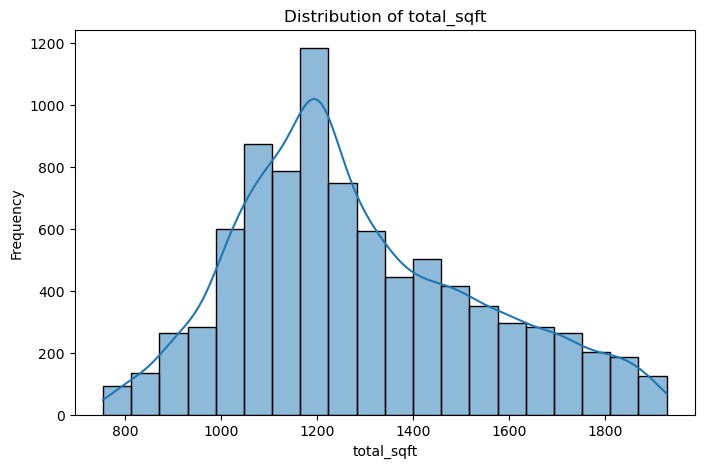

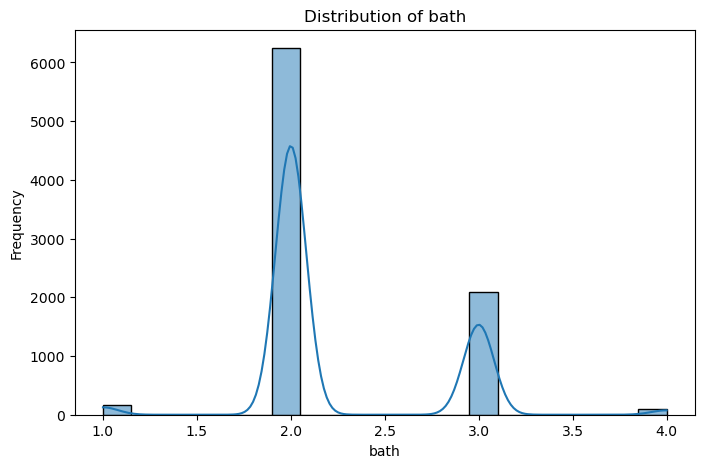

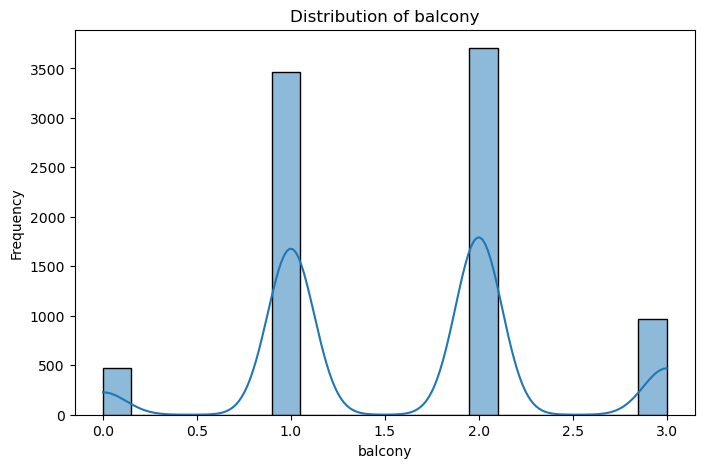

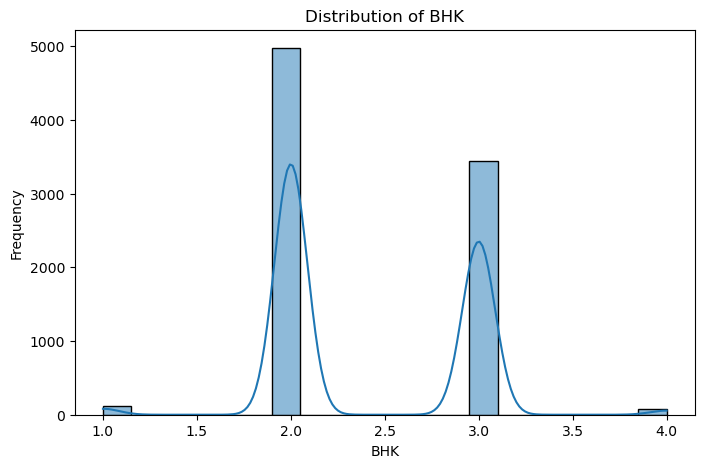

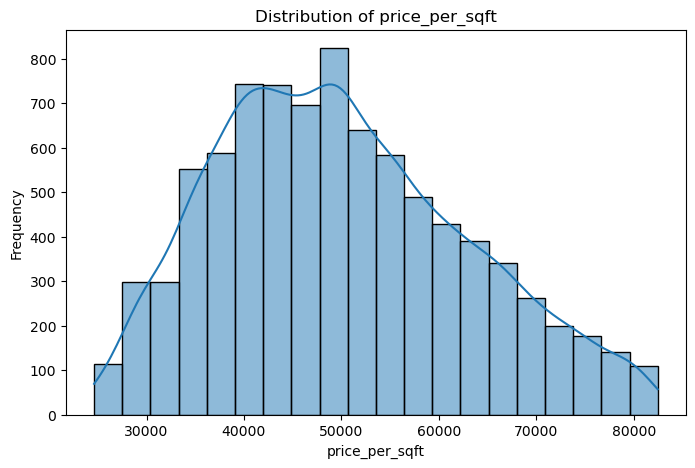

In [5]:
# Plot histograms or density plots for each numerical feature
numerical_features = ['total_sqft', 'bath', 'balcony', 'BHK', 'price_per_sqft']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=20)  # Set kde=True for density plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

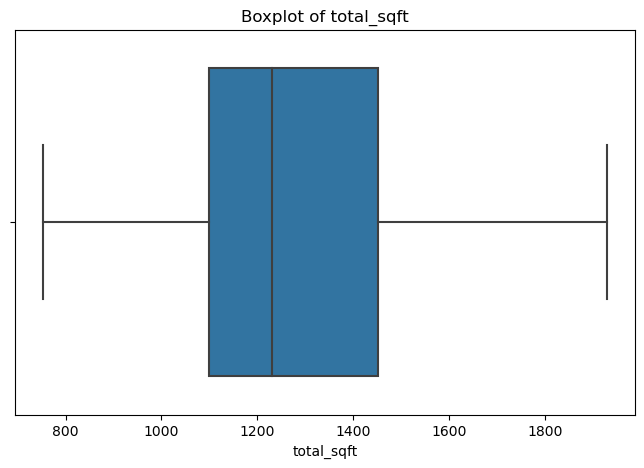

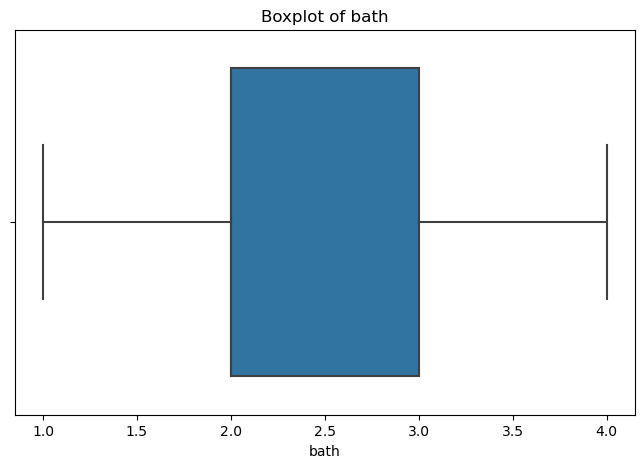

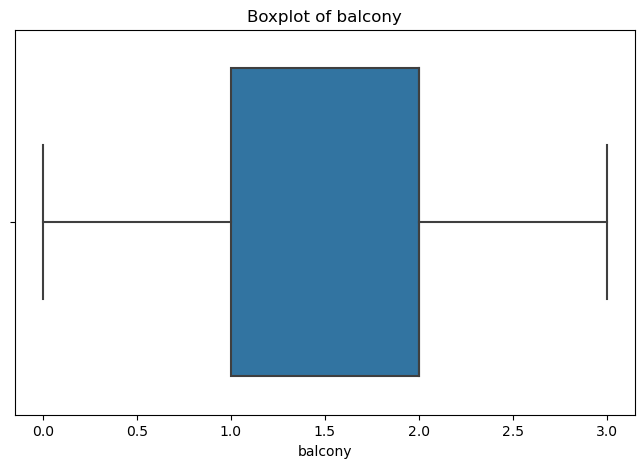

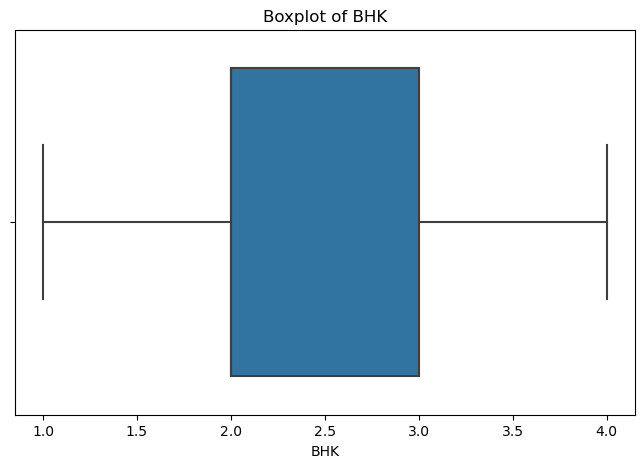

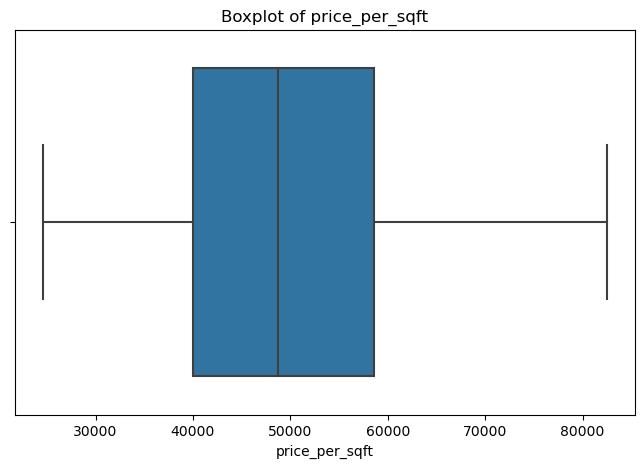

In [6]:
# Plot box plots for numerical features to identify outliers
numerical_features = ['total_sqft', 'bath', 'balcony', 'BHK', 'price_per_sqft']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

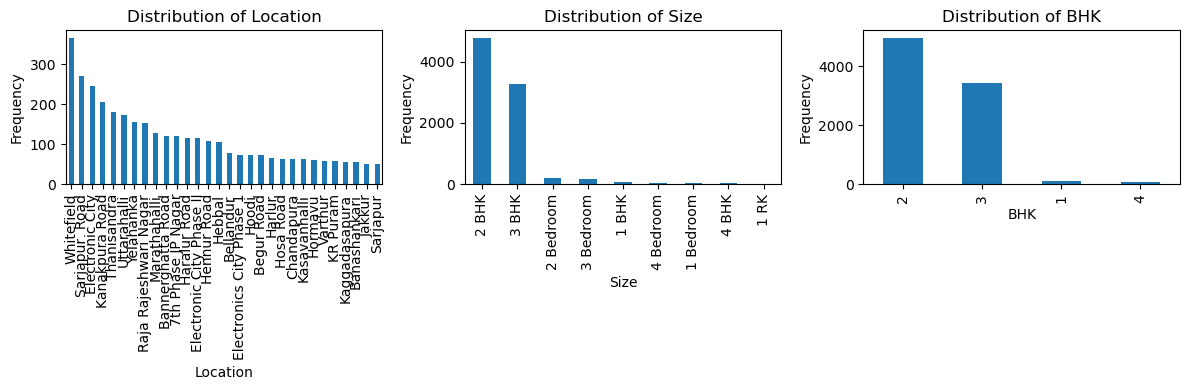

In [7]:
# Count frequency of each category for categorical features
location_counts = df['location'].value_counts()
size_counts = df['size'].value_counts()
BHK_counts = df['BHK'].value_counts()

# Plot bar plots to visualize the distribution of categorical variables
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
location_counts.head(30).plot(kind='bar')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
size_counts.plot(kind='bar')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
BHK_counts.plot(kind='bar')
plt.title('Distribution of BHK')
plt.xlabel('BHK')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

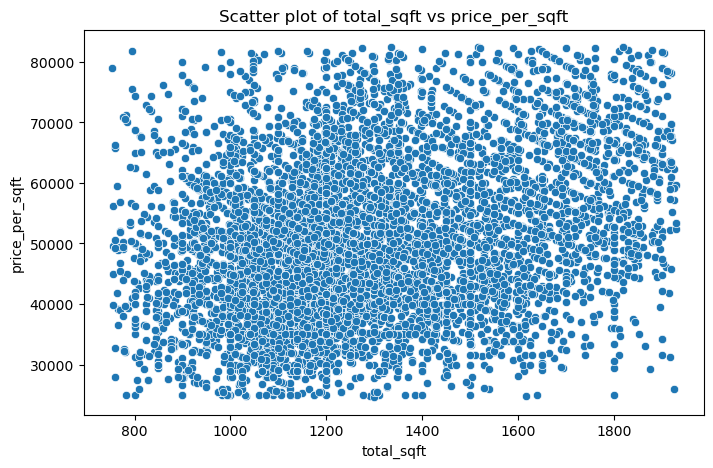

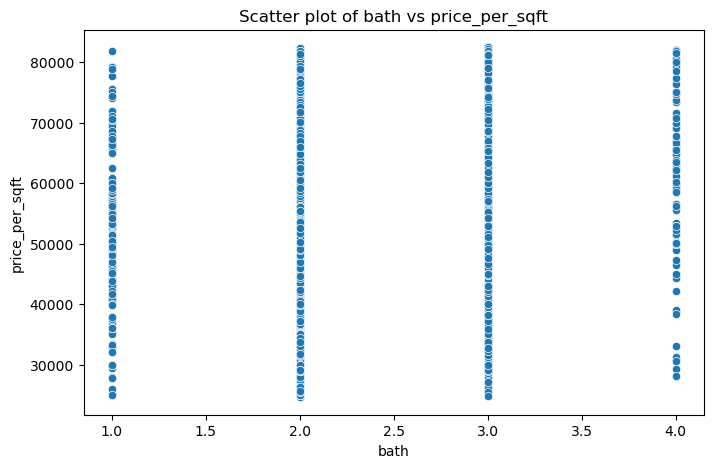

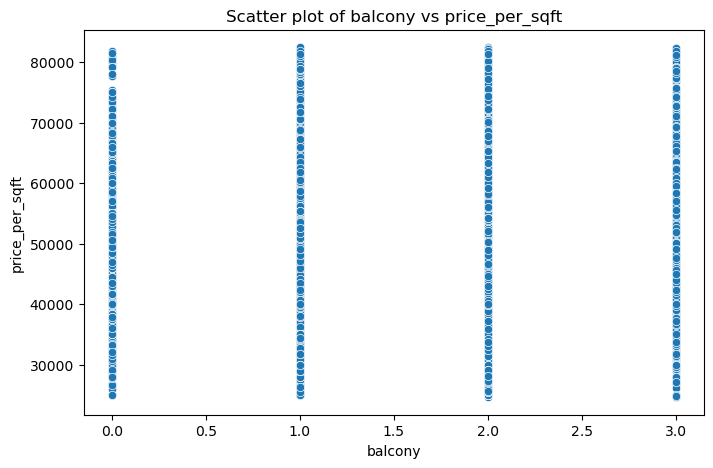

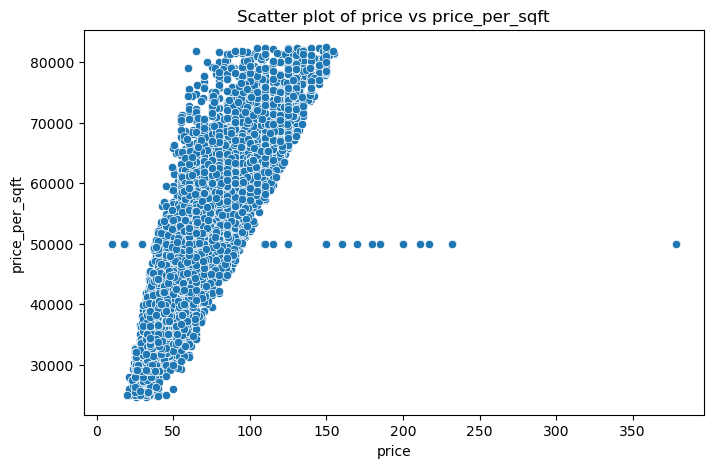

In [8]:
# Scatter plots for numerical features vs. target variable (price_per_sqft)
numerical_features = ['total_sqft', 'bath', 'balcony', 'price']
target_variable = 'price_per_sqft'

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'Scatter plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

In [9]:
# Calculate correlation coefficients (Pearson correlation) between numerical features and the target variable
correlation = df.corr()['price_per_sqft']

# Print correlation coefficients
print(correlation)

total_sqft        0.296221
bath              0.233267
balcony          -0.001558
price             0.819038
BHK               0.144616
price_per_sqft    1.000000
Name: price_per_sqft, dtype: float64


In [10]:
# Calculate covariance between numerical features and the target variable
covariance = df.cov()['price_per_sqft']

# Print covariance
print(covariance)

total_sqft        9.636906e+05
bath              1.491102e+03
balcony          -1.510426e+01
price             2.645346e+05
BHK               9.922680e+02
price_per_sqft    1.638174e+08
Name: price_per_sqft, dtype: float64


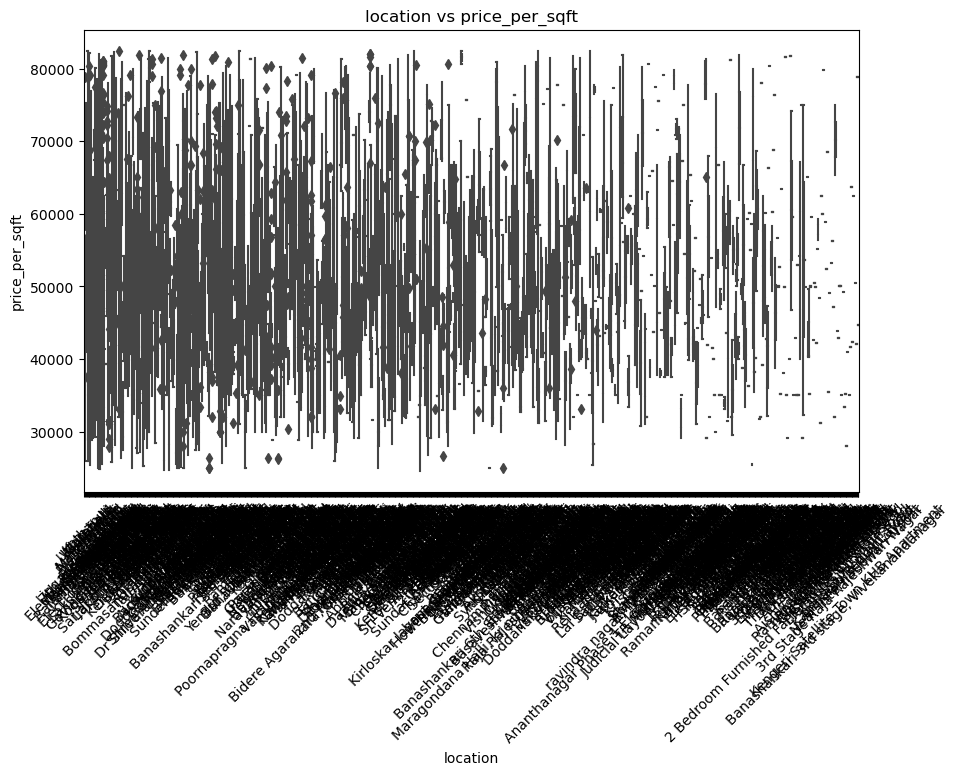

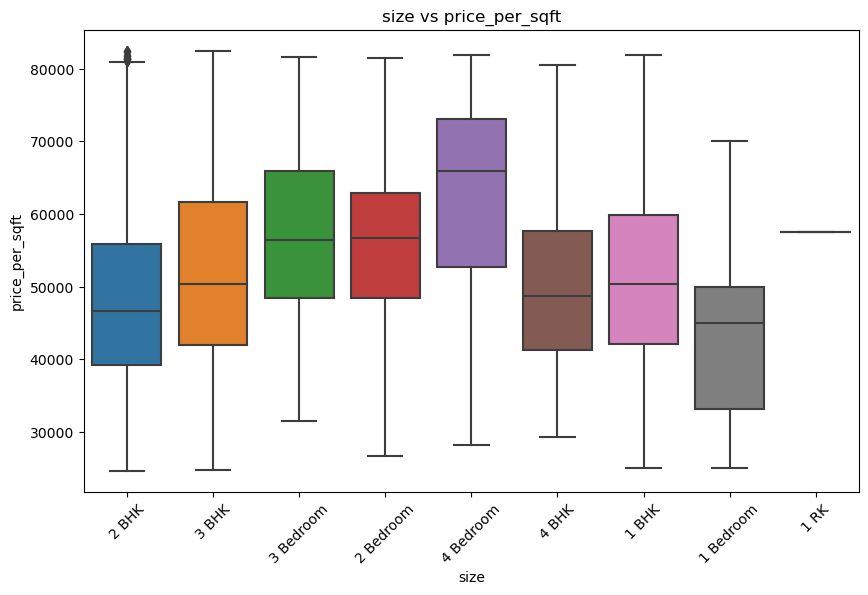

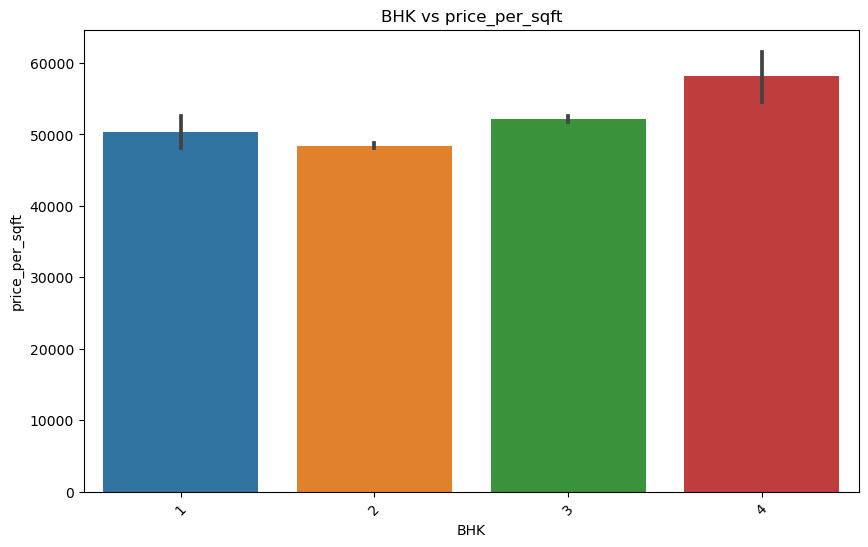

In [11]:
import scipy.stats as stats
# Box plots or bar plots for categorical features vs. target variable (price_per_sqft)
categorical_features = ['location', 'size', 'BHK']
target_variable = 'price_per_sqft'

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    if len(df[feature].unique()) > 5:
        sns.boxplot(x=feature, y=target_variable, data=df)
    else:
        sns.barplot(x=feature, y=target_variable, data=df)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.xticks(rotation=45)
    plt.show()

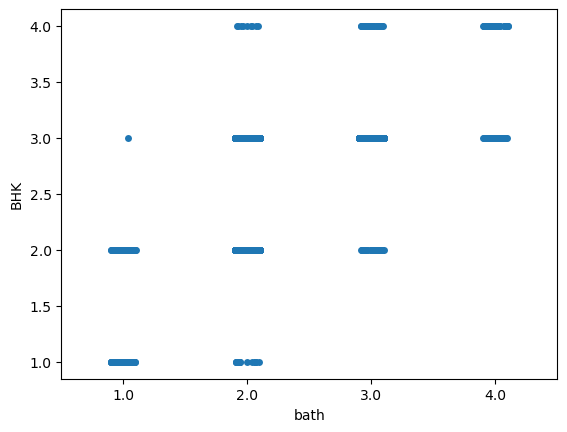

In [44]:
sns.stripplot(x = "bath", y = "BHK", data = df)
plt.show()

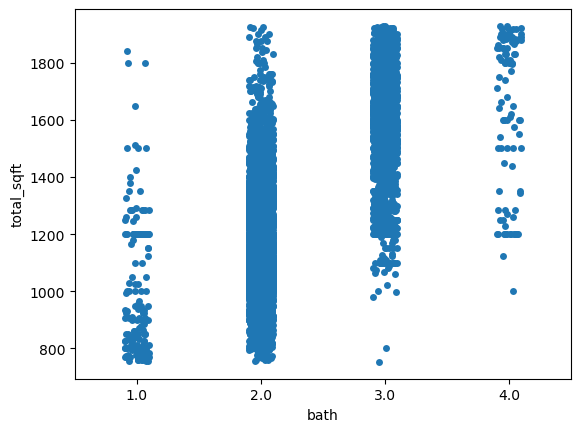

In [46]:
sns.stripplot(x = "bath", y = "total_sqft", data = df)
plt.show()

In [12]:
# ANOVA or Kruskal-Wallis tests for assessing differences in price_per_sqft across categories
for feature in categorical_features:
    if len(df[feature].unique()) > 2:
        # ANOVA test for normally distributed data
        f_statistic, p_value = stats.f_oneway(*[df[df[feature] == level][target_variable] for level in df[feature].unique()])
        print(f'ANOVA test for {feature}: F-statistic = {f_statistic}, p-value = {p_value}')
    else:
        # Kruskal-Wallis test for non-normally distributed data
        stat, p_value = stats.kruskal(*[df[df[feature] == level][target_variable] for level in df[feature].unique()])
        print(f'Kruskal-Wallis test for {feature}: Statistic = {stat}, p-value = {p_value}')

ANOVA test for location: F-statistic = 5.9828649019078926, p-value = 0.0
ANOVA test for size: F-statistic = 41.87669074867454, p-value = 3.0632158759712993e-66
ANOVA test for BHK: F-statistic = 69.90464006800133, p-value = 1.1661607339631108e-44


In [13]:
#the ANOVA test results confirm that the categorical features ('location', 'size', 'BHK') have a significant impact on the 'price_per_sqft'. 
#This information can be valuable for further analysis and decision-making, such as pricing strategies or property valuation.

In [14]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
dtype: int64

# What are the locations associated with the minimum and maximum price_per_sqft values, and what are the respective price_per_sqft values at those locations?

In [29]:
# Find the location with the minimum price_per_sqft and its corresponding value
min_price_location = df.loc[df['price_per_sqft'].idxmin(), 'location']
min_price_per_sqft = df['price_per_sqft'].min()

# Find the location with the maximum price_per_sqft and its corresponding value
max_price_location = df.loc[df['price_per_sqft'].idxmax(), 'location']
max_price_per_sqft = df['price_per_sqft'].max()

print(f"Minimum price_per_sqft: {min_price_per_sqft} at location: {min_price_location}")
print(f"Maximum price_per_sqft: {max_price_per_sqft} at location: {max_price_location}")


Minimum price_per_sqft: 24615.384615384617 at location: Doddabommasandra
Maximum price_per_sqft: 82462.89169873556 at location: Kasavanhalli


# which parameter is highly correlated with price_per_sqft?

In [30]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation coefficients between price_per_sqft and other numerical parameters
price_corr = correlation_matrix['price_per_sqft'].drop('price_per_sqft')  # Remove self-correlation

# Find the parameter(s) with the highest correlation coefficient
max_corr_param = price_corr.idxmax()
max_corr_value = price_corr.max()

print(f"Parameter with the highest correlation with price_per_sqft: {max_corr_param}")
print(f"Highest correlation coefficient: {max_corr_value}")

Parameter with the highest correlation with price_per_sqft: price
Highest correlation coefficient: 0.8190377839169426


In [25]:
# It confirms that price_per_sqft is an important predictor of the overall price
#and suggests that variations in price_per_sqft are strongly associated with variations in the overall price of properties.

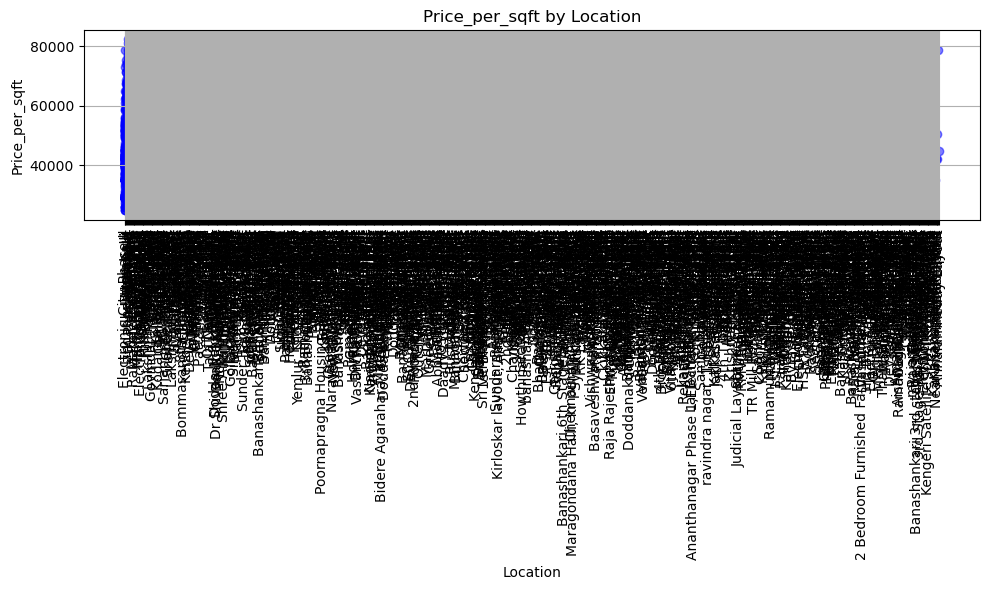

In [35]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['location'], df['price_per_sqft'], color='blue', alpha=0.5)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location')
plt.ylabel('Price_per_sqft')
plt.title('Price_per_sqft by Location')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\s

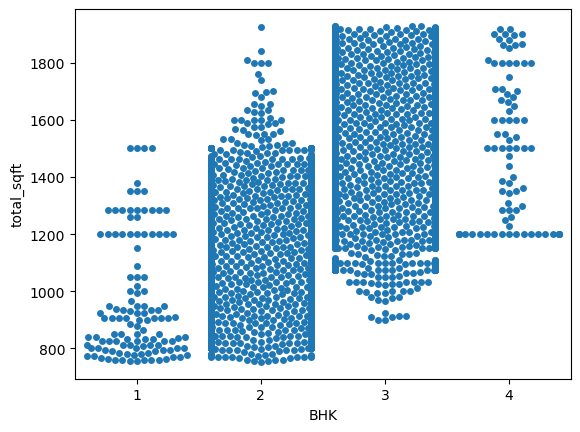

In [49]:
sns.swarmplot(x = "BHK", y = "total_sqft", data = df)
plt.show()